In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from pandas import Timestamp
from datetime import timedelta
from sklearn.preprocessing import StandardScaler


In [2]:
home_dir = op.abspath('./')

data_files = glob.glob(op.join(home_dir,
                        'data',
                        '*.csv'))
sns.set_context('talk')

In [3]:
pilot = 'pilot_total'#pilot_total
pilot_name = 'pilot_total_ltm'
df_orig = pd.read_csv('df_total_p_pilot_total_TEST.csv')

participant_set = set(df_orig['participant'])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2090119370.py:3: DtypeWarning: Columns (255,256,257,258,259,260) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv('df_total_p_pilot_total_TEST.csv')


In [4]:
df = []
for sub in data_files:
    try:
        sub_df = pd.read_csv(sub)
        
        # Filter for participants in participant_set
        if any(sub_df['participant'].isin(participant_set)):
            # Filter for non-empty 'image_recall_response.keys' and reset the index
            data = sub_df.loc[sub_df['image_recall_response.keys'].notna()].reset_index(drop=True)
            df.append(data.copy())
    except Exception as e:
        print(f"Error processing file {sub}: {e}")
        
# Concatenate all filtered data into a single DataFrame
df = pd.concat(df, ignore_index=True)

# Get the count of unique participants
unique_participants_count = len(set(df['participant']))
print(unique_participants_count)

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full/data/PARTICIPANT_WM_Deepgen_2024-10-09_12h13.56.688.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full/data/PARTICIPANT_WM_Deepgen_2024-10-22_22h11.53.949.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full/data/PARTICIPANT_WM_Deepgen_2024-08-28_19h01.07.543.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full/data/PARTICIPANT_WM_Deepgen_2024-09-04_02h15.32.256.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full/data/PARTICIPANT_WM_Deepgen_2025-01-28_21h17.51.789.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen_full/data/PARTICIPANT_WM_Deepgen_2024-05-21_13h00.30.594.csv: No columns to parse from file
Error proc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-29_19h13.31.303.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-22_18h51.55.974.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/168889_WM_Deepgen_2024-12-02_14h03.28.335.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_16h37.45.390.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_20h31.43.754.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-20_22h16.55.250.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psyc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/166894_WM_Deepgen_2024-11-24_12h48.57.508.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-31_12h03.04.245.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-28_11h51.32.313.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-23_16h03.06.466.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_16h25.08.428.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-16_19h20.33.024.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psyc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_09h54.08.716.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_22h08.15.368.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-11-26_10h12.09.906.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h53.04.091.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-03_15h18.28.526.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_00h10.44.014.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psy

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-03_21h57.41.765.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-10_15h30.07.691.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_19h00.38.301.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-04-30_22h56.36.872.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-04-29_22h18.28.594.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-29_22h54.06.052.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

In [5]:
combined_df = pd.concat([df, df_orig], ignore_index=True)


In [6]:
response_counts = combined_df.groupby('participant')['image_recall_response.keys'].count().reset_index()

response_counts = response_counts.rename(columns={'image_recall_response.keys': 'image_recall_response_count'})

print(response_counts)

     participant  image_recall_response_count
0         116851                          240
1         121021                          240
2         123262                          240
3         123790                          240
4         123985                          240
..           ...                          ...
265       170536                          238
266       170665                          240
267       171031                          239
268       171253                          238
269       171304                          240

[270 rows x 2 columns]


In [7]:
min_response_count = response_counts['image_recall_response_count'].min()
min_response_count

0

In [8]:
threshold = 250 * (2 / 3)

below_threshold_count = (response_counts['image_recall_response_count'] < threshold).sum()

print(f"The number of participants with image_recall_response.keys count below {threshold} is: {below_threshold_count}")

The number of participants with image_recall_response.keys count below 166.66666666666666 is: 3


In [9]:
combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/424746830.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)


In [10]:
combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,
                                   np.where(combined_df['image_recall_response.keys'].isin([3, 4]), 1, np.nan))


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2647953418.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,


In [11]:
combined_df['recall_answ'] = np.where(
    combined_df['mem_answ'].isna() | combined_df['acc_recall'].isna(), np.nan,
    np.where(
        (combined_df['mem_answ'] == 0) & (combined_df['acc_recall'] == 0) | 
        (combined_df['mem_answ'] == 1) & (combined_df['acc_recall'] == 1), 1, 0)
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1958824526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['recall_answ'] = np.where(


In [12]:
# # Your existing code
# df['rt_ltm'] = df['image_recall_response.rt']
# result = df.groupby('participant')['rt_ltm'].apply(lambda x: (x > 4).sum())
# participants_with_long_rts = result[result > 0]
# print("Participants with rt_ltm values > 4 seconds:")
# print(participants_with_long_rts)
# count_participants = len(participants_with_long_rts)
# print(f"\nTotal number of participants with rt_ltm values > 4 seconds: {count_participants}")
# total_participants = len(result)
# percentage = (count_participants / total_participants) * 100
# print(f"Percentage of participants with rt_ltm values > 4 seconds: {percentage:.2f}%")

# # Add code to calculate trials information
# # Count total number of trials
# total_trials = len(df)

# # Count trials with rt_ltm > 4
# long_rt_trials = (df['rt_ltm'] > 4).sum()

# # Calculate percentage of trials cut off
# trials_percentage = (long_rt_trials / total_trials) * 100

# print(f"\nTotal number of trials: {total_trials}")
# print(f"Number of trials with rt_ltm > 4 seconds: {long_rt_trials}")
# print(f"Percentage of trials with rt_ltm > 4 seconds: {trials_percentage:.2f}%")

In [13]:
# response_time_column = 'image_recall_response.rt'
# correct_response_times = df[df['recall_answ'] == 1][response_time_column].dropna()
# incorrect_response_times = df[df['recall_answ'] == 0][response_time_column].dropna()

# # Get summary statistics for response times
# response_time_stats = df[response_time_column].describe()

# # Plotting the response times distribution
# plt.figure(figsize=(12, 6))
# sns.histplot(correct_response_times, color='green', kde=True, label='Correct Responses', binwidth=0.5)
# sns.histplot(incorrect_response_times, color='red', kde=True, label='Incorrect Responses', binwidth=0.5)

# plt.title('Response Times Distribution', fontsize=14)
# plt.xlabel('Response Time (seconds)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.xlim(2, 6)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # Displaying summary statistics for response times
# print(response_time_stats)


In [14]:
combined_df = combined_df[combined_df['image_recall_response.rt'] <= 4]


In [15]:
recall_count_per_participant = combined_df.groupby('participant')['recall_answ'].sum().reset_index()

recall_count_per_participant = recall_count_per_participant.rename(columns={'recall_answ': 'recall_answ_count'})

print(recall_count_per_participant)

     participant  recall_answ_count
0         116851              128.0
1         121021              165.0
2         123262              136.0
3         123790              159.0
4         123985              150.0
..           ...                ...
263       170536              123.0
264       170665              156.0
265       171031              172.0
266       171253              133.0
267       171304              159.0

[268 rows x 2 columns]


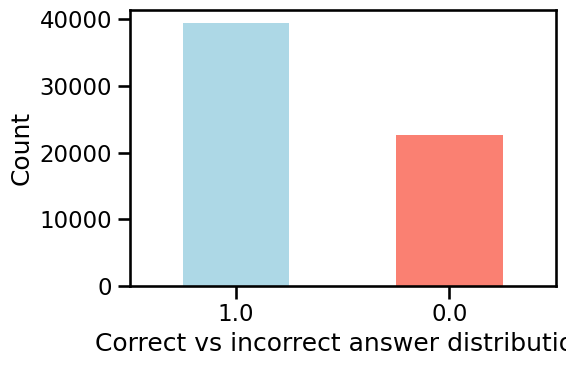

In [16]:
recall_counts = combined_df['recall_answ'].value_counts()

plt.figure(figsize=(6, 4))
recall_counts.plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Counts of Recall Ans = 1 vs 0')
plt.xlabel('Correct vs incorrect answer distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [17]:
answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
                  3: 'Probably seen', 4: 'Definitely seen'}

combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3563330006.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


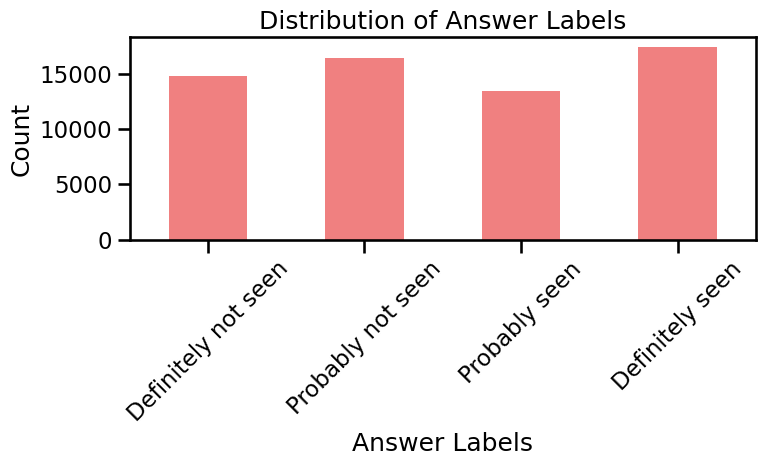

In [18]:
label_order = [
    'Definitely not seen', 
    'Probably not seen', 
    'Probably seen', 
    'Definitely seen'
]

# Count occurrences and sort by the defined order
answer_counts = combined_df['Answer Labels'].value_counts()
answer_counts = answer_counts.reindex(label_order)

plt.figure(figsize=(8, 5))
answer_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [19]:
df = combined_df

In [20]:
correctLTM_df = df[df['recall_answ'] == 1]

correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2467276519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


In [21]:
answer_counts_corr = correctLTM_df['Answer Labels'].value_counts()
answer_counts_corr = answer_counts_corr.reindex(label_order)

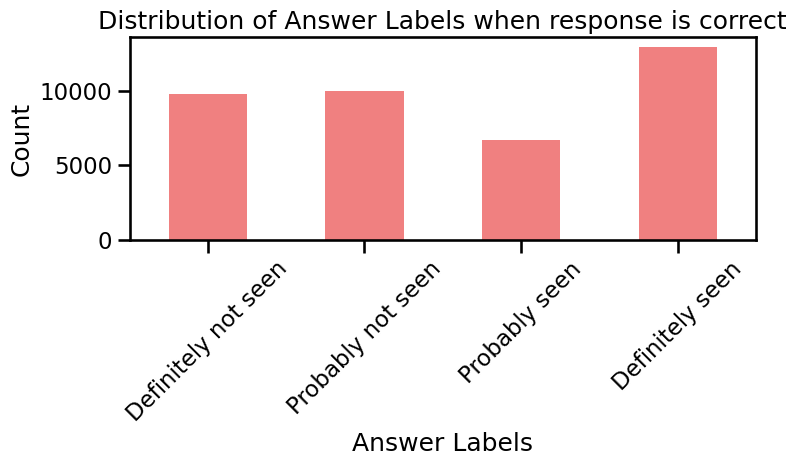

In [22]:
plt.figure(figsize=(8, 5))
answer_counts_corr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is correct')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1710196208.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['recall_category'] = df['image_recall_response.keys'].map({
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1710196208.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['correct_recall'] = ((df['acc_recall'] == 1) &


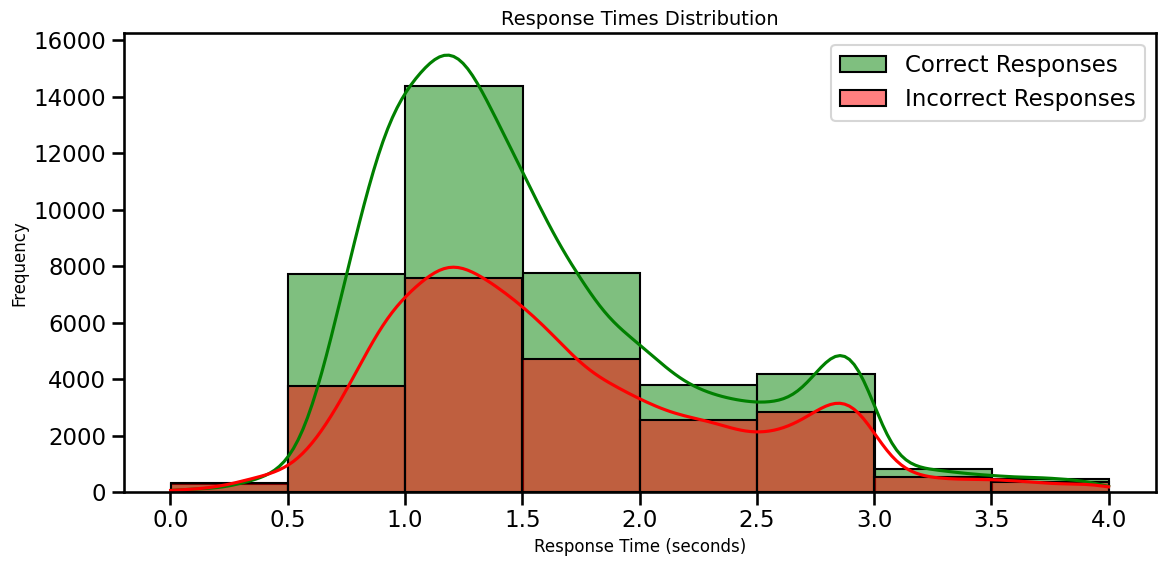

count    62043.000000
mean         1.606918
std          0.711927
min          0.000400
25%          1.080950
50%          1.420700
75%          2.006700
max          3.999800
Name: image_recall_response.rt, dtype: float64


In [23]:
df['recall_category'] = df['image_recall_response.keys'].map({
    1: 'Definitely not seen',
    2: 'Probably not seen',
    3: 'Probably seen',
    4: 'Definitely seen'
})

df['correct_recall'] = ((df['acc_recall'] == 1) & 
                              (df['Answer Labels'].isin(['Probably seen', 'Definitely seen']))) | \
                             ((df['acc_recall'] == 0) & 
                              (df['Answer Labels'].isin(['Definitely not seen', 'Probably not seen'])))



response_time_column = 'image_recall_response.rt'
correct_response_times = df[df['recall_answ'] == 1][response_time_column].dropna()
incorrect_response_times = df[df['recall_answ'] == 0][response_time_column].dropna()

# Get summary statistics for response times
response_time_stats = df[response_time_column].describe()

# Plotting the response times distribution
plt.figure(figsize=(12, 6))
sns.histplot(correct_response_times, color='green', kde=True, label='Correct Responses', binwidth=0.5)
sns.histplot(incorrect_response_times, color='red', kde=True, label='Incorrect Responses', binwidth=0.5)

plt.title('Response Times Distribution', fontsize=14)
plt.xlabel('Response Time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying summary statistics for response times
print(response_time_stats)


#####more fine graned bins

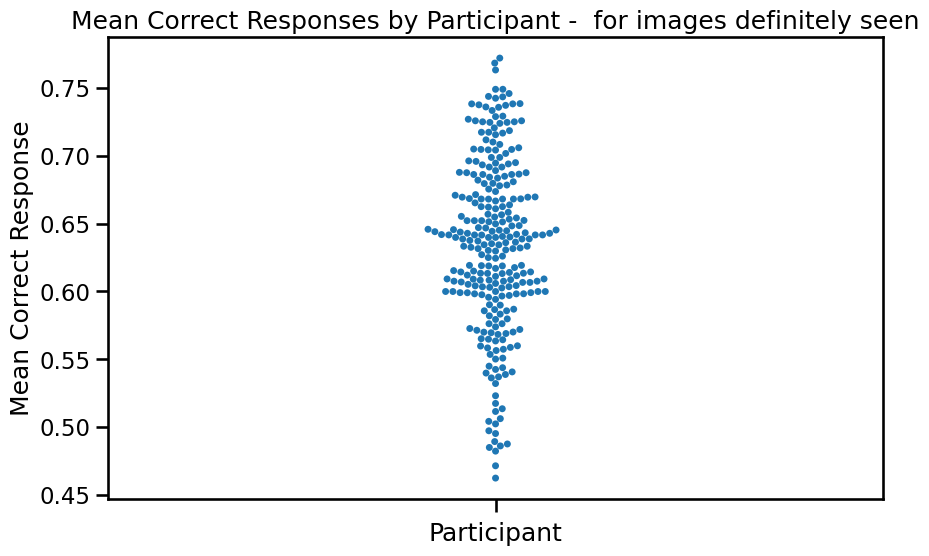

In [24]:
# Convert 'resp_correct' to numeric, coercing errors to NaN (non-numeric to NaN)
df['recall_answ'] = pd.to_numeric(df['recall_answ'], errors='coerce')

# Now, calculate the mean 'resp_correct' for each participant
mean_resp_correct = df.groupby('participant')['recall_answ'].mean().reset_index()

# Create the swarm plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.swarmplot(y='recall_answ', data=mean_resp_correct)

plt.title('Mean Correct Responses by Participant -  for images definitely seen')
plt.xlabel('Participant')
plt.ylabel('Mean Correct Response')

# Show the plot
plt.show()

In [25]:
##acc_recall is 1 if the image was actually seen
##mem_answ is 1 if the said seen or probably seen
###recall_answ is 1 if these two are both 1 or both 0
cols_to_copy = ['attend', 'reliability', 'validity', 'test_item']


In [26]:
prc = []
for a in df['acc_recall']:
    if a == 1:
        prc.append('Correct')
    else:
        prc.append('Wrong')
df['Past Response Correctness'] = prc


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/477457660.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Past Response Correctness'] = prc


In [27]:
def fill_non_nan_columns(row):
    # Locate matching rows in df_orig based on participant and image conditions
    matching_rows = df_orig[
        (df_orig['participant'] == row['participant']) &
        ((df_orig['img1'] == row['ImagePath']) | 
         (df_orig['img2'] == row['ImagePath']) | 
         (df_orig['ping_img'] == row['ImagePath']))
    ]
    
    if not matching_rows.empty:
        match = matching_rows.iloc[0]
        for col in match.index:
            # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
            if col not in ['participant'] and pd.notna(match[col]):
                row[col] = match[col]
    return row

df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [28]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [29]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [30]:
def is_mean_centered(series, tol=1e-6):
    return abs(series.mean()) < tol


In [31]:
df['Distractor V2 Similarity Preference'] = df['v2_prefers'] 
df['Distractor IT Similarity Preference'] = df['it_prefers']

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2688763724.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2688763724.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2688763724.py:18: PerformanceWarning: DataF

In [32]:
df['it_sim_dis_diff_test']

0        0.832221
1             NaN
2        1.072043
3             NaN
4             NaN
           ...   
64657         NaN
64658         NaN
64659    1.099688
64660   -0.618602
64664   -0.856513
Name: it_sim_dis_diff_test, Length: 62043, dtype: float64

In [33]:
df['tested_item'] = df['Tested Item']
df['ret_rel'] = df['Retrocue Reliability']

In [34]:
df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')


df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/641193304.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/641193304.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/641193304.py:9: PerformanceWarning: DataFrame is hi

In [35]:
df['V2 Distractor Similarity to Tested Item'] = df['v2_sim_dis_test']
df['IT Distractor Similarity to Tested Item'] = df['it_sim_dis_test']
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test']



In [36]:
df['category'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else ('foil' if 'foil' in str(row['ImagePath']).lower()
          else ('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1383008241.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['category'] = df.apply(


In [37]:
df['category']

0            tested
1              foil
2        not tested
3              foil
4              foil
            ...    
64657          foil
64658          foil
64659    distractor
64660        tested
64664        tested
Name: category, Length: 62043, dtype: object

In [38]:
# df['mem_stim_type'] = df.apply(
#     lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
#     else  (('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
#                              (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
#                 else 'not tested')),
#     axis=1
# )


In [39]:
# df['mem_stim_type']

In [40]:
df['Tested'] = df['category']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3026568815.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Tested'] = df['category']


In [41]:
df['Attend'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else 'foil' if (row['category']== 'foil')
    else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
    else 'not attended',
    axis=1
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/241223853.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Attend'] = df.apply(


In [42]:
def calculate_ltm_reliability(row):
    if (row['category']== 'foil'):
        return 'foil'
    elif row['reliability'] > 0.7:
        return 'high'
    elif row['reliability'] < 0.7:
        return 'low'
    
    else:
        return None  # Optional: Default case, if needed

# Apply the function to the dataframe
df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2768316501.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


In [43]:
scaler = StandardScaler()
df['attend_binary'] = np.where(df['Attend'] == 'attended',0 , 1)
df['attend_binary_z'] = scaler.fit_transform(df[['attend_binary']])
scaler = StandardScaler()
df['tested_binary'] = np.where(df['Tested'] == 'tested',0 , 1)
df['tested_binary_z'] = scaler.fit_transform(df[['tested_binary']])


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/870860499.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['attend_binary'] = np.where(df['Attend'] == 'attended',0 , 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/870860499.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['attend_binary_z'] = scaler.fit_transform(df[['attend_binary']])
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/870860499.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usual

In [44]:
#if ltm item was not tested in wm we need to update it and v2
#'V2 Distractor Similarity to LTM Item'
#'IT Distractor Similarity to LTM Item'
#'LTM - NonLTM V2 Distractor Similarity'
#'LTM - NonLTM IT Distractor Similarity'


In [45]:
is_mean_centered(df['IT_root_im2'])


False

In [46]:
def is_mean_centered_ignore_nan(series, tol=1e-6):
    mean_val = series.mean(skipna=True)
    return abs(mean_val) < tol
    
is_mean_centered_ignore_nan(df['IT_root_im2'])


False

In [47]:
df['IT_root_im2']

0        0.642118
1             NaN
2        0.776030
3             NaN
4             NaN
           ...   
64657         NaN
64658         NaN
64659    0.704075
64660    0.351794
64664    0.604854
Name: IT_root_im2, Length: 62043, dtype: float64

In [48]:
# def mean_center(series):
#     mean_val = series.mean(skipna=True)
#     return series - mean_val

def z_score(series):
    mean_val = series.mean(skipna=True)
    std_val = series.std(skipna=True)
    return (series - mean_val) / std_val
    
# for l in ['IT_root_im1', 'IT_root_im2', 'V2_root_im1', 'V2_root_im2']:
#     df[l] = mean_center(df[l])


In [49]:
###there its df_filtered df_filtered = df[(df['category'] == 'tested') | (df['category'] == 'not tested')]


df['it_ltm'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['IT_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['IT_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)
    
df['v2_ltm'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['V2_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['V2_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3379015507.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['it_ltm'] = df.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3379015507.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['v2_ltm'] = df.apply(


In [50]:
df['it_ltm']

0          0.642118
1        not tested
2         -0.296012
3        not tested
4        not tested
            ...    
64657    not tested
64658    not tested
64659    distractor
64660     -0.266808
64664      -0.25166
Name: it_ltm, Length: 62043, dtype: object

In [51]:
 ####this is df_filtered there   
df['it_ltm_diff'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['IT_root_im1'] - row['IT_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['IT_root_im2'] - row['IT_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

    
df['v2_ltm_diff'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['V2_root_im1'] - row['V2_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['V2_root_im2'] - row['V2_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3054671882.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['it_ltm_diff'] = df.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3054671882.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['v2_ltm_diff'] = df.apply(


In [52]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Attend,Reliability,attend_binary,attend_binary_z,tested_binary,tested_binary_z,it_ltm,v2_ltm,it_ltm_diff,v2_ltm_diff
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,not attended,low,1,0.438792,0,-2.285928,0.642118,0.210374,0.832221,0.14653
1,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,not attended,low,1,0.438792,1,0.437459,-0.296012,0.072914,-1.072043,-0.018737
3,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
4,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64657,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
64658,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
64659,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,low,1,0.438792,1,0.437459,distractor,distractor,distractor,distractor
64660,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,not attended,high,1,0.438792,0,-2.285928,-0.266808,0.039954,-0.618602,-0.027556


In [53]:
exclude_images = ['./stimuli/new_foil_stims/buoy_12s.jpg']

# Create a mask for rows to keep (where the condition is NOT met)
mask = ~((df['pilot_number'] == 1) & 
          (df['ImagePath'].isin(exclude_images)))  # Added closing parenthesis here
# mask = ~(((df['ImagePath'].isin(exclude_images)))  # Added closing parenthesis here

# Apply the mask to filter the dataframe
df_testing_filtered = df[mask]
df_testing_filtered

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Attend,Reliability,attend_binary,attend_binary_z,tested_binary,tested_binary_z,it_ltm,v2_ltm,it_ltm_diff,v2_ltm_diff
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,not attended,low,1,0.438792,0,-2.285928,0.642118,0.210374,0.832221,0.14653
1,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,not attended,low,1,0.438792,1,0.437459,-0.296012,0.072914,-1.072043,-0.018737
3,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
4,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64657,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
64658,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
64659,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,low,1,0.438792,1,0.437459,distractor,distractor,distractor,distractor
64660,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,not attended,high,1,0.438792,0,-2.285928,-0.266808,0.039954,-0.618602,-0.027556


In [54]:
# Using str.contains to find rows with 'hockey_stick_11s.jpg' in the path
matching_rows = df[df['ImagePath'].str.contains('buoy')]
print(f"Found {len(matching_rows)} matching rows")

# # Then try your filtering
# exclude_images = ['./stimuli/new_foil_stims/hockey_stick_11s.jpg']
# mask = ~((df['pilot_number'] == 1) & (df['ImagePath'].isin(exclude_images)))
# df_testing_filtered = df[mask]
# print(f"Original df: {len(df)} rows, Filtered df: {len(df_testing_filtered)} rows")

Found 0 matching rows


In [55]:
# dfx = pd.read_csv("df_ltm_testing.csv")

In [56]:
df["ImagePath"]

0                                  ./stimuli/193_3.jpg
1        ./stimuli/new_foil_stims/hockey_stick_11s.jpg
2                                  ./stimuli/219_2.jpg
3                ./stimuli/new_foil_stims/bark_12s.jpg
4               ./stimuli/new_foil_stims/money_06s.jpg
                             ...                      
64657     ./stimuli/new_foil_stims/coffeemaker_12s.jpg
64658    ./stimuli/new_foil_stims/wire_cutters_01b.jpg
64659                              ./stimuli/189_1.jpg
64660                              ./stimuli/141_2.jpg
64664                               ./stimuli/67_2.jpg
Name: ImagePath, Length: 62043, dtype: object

In [57]:
# df.to_csv("df_ltm_testing_pilot6.csv")

In [58]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Attend,Reliability,attend_binary,attend_binary_z,tested_binary,tested_binary_z,it_ltm,v2_ltm,it_ltm_diff,v2_ltm_diff
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,not attended,low,1,0.438792,0,-2.285928,0.642118,0.210374,0.832221,0.14653
1,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,not attended,low,1,0.438792,1,0.437459,-0.296012,0.072914,-1.072043,-0.018737
3,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
4,NaN,NaN,157210,2024-10-18_18h29.32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64657,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
64658,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,foil,foil,1,0.438792,1,0.437459,not tested,not tested,not tested,not tested
64659,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,distractor,low,1,0.438792,1,0.437459,distractor,distractor,distractor,distractor
64660,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,not attended,high,1,0.438792,0,-2.285928,-0.266808,0.039954,-0.618602,-0.027556


In [59]:
# # Your existing code
# df['rt_ltm'] = df['image_recall_response.rt']
# result = df.groupby('participant')['rt_ltm'].apply(lambda x: (x > 4).sum())
# participants_with_long_rts = result[result > 0]
# print("Participants with rt_ltm values > 4 seconds:")
# print(participants_with_long_rts)
# count_participants = len(participants_with_long_rts)
# print(f"\nTotal number of participants with rt_ltm values > 4 seconds: {count_participants}")
# total_participants = len(result)
# percentage = (count_participants / total_participants) * 100
# print(f"Percentage of participants with rt_ltm values > 4 seconds: {percentage:.2f}%")

# # Add code to calculate trials information
# # Count total number of trials
# total_trials = len(df)

# # Count trials with rt_ltm > 4
# long_rt_trials = (df['rt_ltm'] > 4).sum()

# # Calculate percentage of trials cut off
# trials_percentage = (long_rt_trials / total_trials) * 100

# print(f"\nTotal number of trials: {total_trials}")
# print(f"Number of trials with rt_ltm > 4 seconds: {long_rt_trials}")
# print(f"Percentage of trials with rt_ltm > 4 seconds: {trials_percentage:.2f}%")

In [60]:
# sum(result)

### Ensure the column is numeric


In [61]:


df_filtered = df[(df['category'] == 'tested') | (df['category'] == 'not tested')]
df_distractor = df[df['category'] == 'distractor']

In [62]:
# First, convert the columns to numeric type
df_filtered['v2_ltm'] = pd.to_numeric(df_filtered['v2_ltm'], errors='coerce')
df_filtered['it_ltm'] = pd.to_numeric(df_filtered['it_ltm'], errors='coerce')
df_filtered['v2_ltm_diff'] = pd.to_numeric(df_filtered['v2_ltm_diff'], errors='coerce')
df_filtered['it_ltm_diff'] = pd.to_numeric(df_filtered['it_ltm_diff'], errors='coerce')

# Then create squared columns using vectorized operations (more efficient than list comprehension)
df_filtered['v2_ltm_sq'] = df_filtered['v2_ltm']**2
df_filtered['it_ltm_sq'] = df_filtered['it_ltm']**2
df_filtered['v2_ltm_diff_sq'] = df_filtered['v2_ltm_diff']**2
df_filtered['it_ltm_diff_sq'] = df_filtered['it_ltm_diff']**2

df_filtered['v2_ltm_cube'] = df_filtered['v2_ltm']**3
df_filtered['it_ltm_cube'] = df_filtered['it_ltm']**3
df_filtered['v2_ltm_diff_cube'] = df_filtered['v2_ltm_diff']**3
df_filtered['it_ltm_diff_cube'] = df_filtered['it_ltm_diff']**3

# Z-score all columns
for l in ['v2_ltm','it_ltm', 'v2_ltm_diff', 'it_ltm_diff', 'v2_ltm_sq', 'it_ltm_sq', 'v2_ltm_diff_sq', 'it_ltm_diff_sq','v2_ltm_cube', 'it_ltm_cube', 'v2_ltm_diff_cube', 'it_ltm_diff_cube' ]:
    df_filtered[l+'_z'] = z_score(df_filtered[l])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/429886806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['v2_ltm'] = pd.to_numeric(df_filtered['v2_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/429886806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_ltm'] = pd.to_numeric(df_filtered['it_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/429886806.py:4: SettingWithCopyWarnin

In [63]:
df_distractor = df[df['category'] == 'distractor']


In [64]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [65]:
# for l in ['it_ltm_diff', 'v2_ltm_diff', 'it_ltm', 'v2_ltm']:
#     df_filtered[l] = mean_center(df_filtered[l])

df_filtered['it_pos_neg_ltm'] =  np.where(df_filtered['it_ltm_diff'] <= 0, -1, 1)
df_filtered['v2_pos_neg_ltm'] =  np.where(df_filtered['v2_ltm_diff'] <= 0, -1, 1)
# df_filtered['it_pos_neg_ltm_abs'] =  np.where(df_filtered['it_ltm'] <= 0, -1, 1)
# df_filtered['v2_pos_neg_ltm_abs'] =  np.where(df_filtered['v2_ltm'] <= 0, -1, 1)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/4080592942.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['it_pos_neg_ltm'] =  np.where(df_filtered['it_ltm_diff'] <= 0, -1, 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/4080592942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_pos_neg_ltm'] =  np.where(df_filtered['it_ltm_diff'] <= 0, -1, 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/4080592942.py:5: PerformanceWarning: D

In [66]:
df_filtered_corr = df_filtered[df_filtered['resp_correct'] == 1.0]

In [67]:
df_distractor_correct_wm = df_distractor[
    ((df_distractor['resp_correct'] == 1))
]

df_distractor_correct_wm = remove_unit_variance(df_distractor_correct_wm,'recall_answ','participant')
df_distractor_correct_wm['LTM Accuracy'] = df_distractor_correct_wm['recall_answ_within']
df_distractor_correct_wm = remove_unit_variance(df_distractor_correct_wm,'image_recall_response.rt','participant')
df_distractor_correct_wm['analysis_rt'] = df_distractor_correct_wm['image_recall_response.rt_within']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3458006234.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3458006234.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2994571638.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

In [68]:
df_correct_wm = df_filtered[
    ((df_filtered['resp_correct'] == 1))
]

df_correct_wm = remove_unit_variance(df_correct_wm,'recall_answ','participant')
df_correct_wm['LTM Accuracy'] = df_correct_wm['recall_answ_within']
df_correct_wm =  remove_unit_variance(df_correct_wm,'image_recall_response.rt','participant')
df_correct_wm['analysis_rt'] = df_correct_wm['image_recall_response.rt_within']

df_incorrect_wm = df_filtered[
    ((df_filtered['resp_correct'] == 0))
]

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3458006234.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/3458006234.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/533136850.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

In [69]:
df_correct_wm_corr = df_correct_wm[df_correct_wm['recall_answ'] == 1]
df_distractor_correct_wm_corr = df_distractor_correct_wm[df_distractor_correct_wm['recall_answ'] == 1]


In [70]:



def flip_z_sq_z(df, column_name):
    scaler = StandardScaler()
    scaler_sq = StandardScaler()
    scaler_cube = StandardScaler()
    
    df[column_name + '_sign'] = np.where(df[column_name] <= 0, -1, 1) * df[column_name]
    
    df[column_name + '_sign_z'] = scaler.fit_transform(df[[column_name + '_sign']])
    scaler = StandardScaler()

    
    df[column_name + '_sign_sq'] = df[column_name + '_sign_z'] ** 2
    df[column_name + '_sign_cube'] = df[column_name + '_sign_z'] ** 3
    
    df[column_name + '_sign_sq_z'] = scaler_sq.fit_transform(df[[column_name + '_sign_sq']])
    
    df[column_name + '_sign_cube_z'] = scaler_cube.fit_transform(df[[column_name + '_sign_cube']])
    
    return df

for l in ['v2_ltm_diff', 'it_ltm_diff', 'v2_ltm', 'it_ltm']:
    df_correct_wm = flip_z_sq_z(df_correct_wm, l)


for l in ['v2_sim_dis_diff_test', 'it_sim_dis_diff_test', 'v2_sim_dis_test', 'it_sim_dis_test']:
    df_distractor_correct_wm = flip_z_sq_z(df_distractor_correct_wm, l)



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1870040760.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name + '_sign'] = np.where(df[column_name] <= 0, -1, 1) * df[column_name]
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1870040760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_sign'] = np.where(df[column_name] <= 0, -1, 1) * df[column_name]
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/1870040760.py:8: PerformanceWarnin

In [71]:
def is_z_scored(series, mean_tol=1e-6, std_tol=1e-6):
    mean_val = series.mean(skipna=True)
    std_val = series.std(skipna=True)
    return (abs(mean_val) < mean_tol) and (abs(std_val - 1) < std_tol)


In [72]:
df_correct_wm['it_ltm'] = pd.to_numeric(df_correct_wm['it_ltm'], errors='coerce')
df_correct_wm['v2_ltm'] = pd.to_numeric(df_correct_wm['v2_ltm'], errors='coerce')
df_correct_wm['it_ltm_diff'] = pd.to_numeric(df_correct_wm['it_ltm_diff'], errors='coerce')
df_correct_wm['v2_ltm_diff'] = pd.to_numeric(df_correct_wm['v2_ltm_diff'], errors='coerce')

df_correct_wm['IT_ltm_binned'] = pd.qcut(df_correct_wm['it_ltm_diff'], 5, duplicates='drop')
df_correct_wm['V2_ltm_binned'] = pd.qcut(df_correct_wm['v2_ltm_diff'], 5, duplicates='drop')
df_correct_wm['IT_ltm_abs_binned'] = pd.qcut(df_correct_wm['it_ltm'], 5, duplicates='drop')
df_correct_wm['V2_ltm_abs_binned'] = pd.qcut(df_correct_wm['v2_ltm'], 5, duplicates='drop')

df_correct_wm['IT_ltm_binned'] = df_correct_wm['IT_ltm_binned'].apply(process_interval)
df_correct_wm['V2_ltm_binned'] = df_correct_wm['V2_ltm_binned'].apply(process_interval)
df_correct_wm['IT_ltm_abs_binned'] = df_correct_wm['IT_ltm_abs_binned'].apply(process_interval)
df_correct_wm['V2_ltm_abs_binned'] = df_correct_wm['V2_ltm_abs_binned'].apply(process_interval)



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2238935982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['it_ltm'] = pd.to_numeric(df_correct_wm['it_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2238935982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['v2_ltm'] = pd.to_numeric(df_correct_wm['v2_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2238935982.py:3: SettingWit

In [73]:
for l in ['it_ltm', 'v2_ltm', 'it_ltm_sq',  'v2_ltm_sq', 'it_ltm_cube', 'v2_ltm_cube', 'reliability_binary', 'attend_binary', 'tested_binary'
         , 'it_ltm_diff', 'v2_ltm_diff', 'it_ltm_diff_sq', 'v2_ltm_diff_sq', 'it_ltm_diff_cube', 'v2_ltm_diff_cube']:
    df_correct_wm[l+'_z'] = z_score(df_correct_wm[l])


for l in ['it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_test_sq', 'v2_sim_dis_test_sq', 'it_sim_dis_test_cube', 'v2_sim_dis_test_cube', 
          'reliability_binary', 'validity_binary', 'tested_binary',
          'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'it_sim_dis_diff_test_sq', 'v2_sim_dis_diff_test_sq', 'it_sim_dis_diff_test_cube', 'v2_sim_dis_diff_test_cube']:
    df_distractor_correct_wm[l+'_z'] = z_score(df_distractor_correct_wm[l])




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2206020702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm[l+'_z'] = z_score(df_correct_wm[l])
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/2206020702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distractor_correct_wm[l+'_z'] = z_score(df_distractor_correct_wm[l])


In [74]:

x_to_p_mapping_rounded = df_correct_wm.set_index(df_correct_wm['x_values_it'].round(3))['p_values_it_flipped'].to_dict()
df_correct_wm['p_values_it_flipped_ltm'] = df_correct_wm['it_ltm_diff'].round(3).map(x_to_p_mapping_rounded)

x_to_p_mapping_rounded = df_correct_wm.set_index(df_correct_wm['x_values_v2'].round(3))['p_values_v2_flipped'].to_dict()
df_correct_wm['p_values_v2_flipped_ltm'] = df_correct_wm['v2_ltm_diff'].round(3).map(x_to_p_mapping_rounded)

print(f"Number of matches with rounding: {df_correct_wm['p_values_it_flipped_ltm'].notna().sum()}")
print(f"Number of matches with rounding: {df_correct_wm['p_values_v2_flipped_ltm'].notna().sum()}")


Number of matches with rounding: 14815
Number of matches with rounding: 14596


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/441753226.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_correct_wm['p_values_it_flipped_ltm'] = df_correct_wm['it_ltm_diff'].round(3).map(x_to_p_mapping_rounded)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_87997/441753226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['p_values_it_flipped_ltm'] = df_correct_wm['it_ltm_diff'].round(3).map(x_to_p_mapping_rounded)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ip

In [75]:
df_correct_wm

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,it_ltm_sign_sq,it_ltm_sign_cube,it_ltm_sign_sq_z,it_ltm_sign_cube_z,IT_ltm_binned,V2_ltm_binned,IT_ltm_abs_binned,V2_ltm_abs_binned,p_values_it_flipped_ltm,p_values_v2_flipped_ltm
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.999562,0.999343,-0.000419,0.238843,"(0.25, 0.83]","(0.093, 0.17]","(0.4, 0.65]","(0.13, 0.27]",0.228072,0.240978
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.131039,-0.047435,-0.831381,-0.199127,"(-1.2, -0.84]","(-0.042, 0.034]","(-0.51, -0.23]","(0.06, 0.09]",0.286045,0.252718
16,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.037809,-1.057246,0.036174,-0.621630,"(-0.36, 0.25]","(-0.17, -0.11]","(0.031, 0.4]","(0.06, 0.09]",0.252870,0.274444
19,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.878437,0.823315,-0.116306,0.165194,"(0.83, 1.2]","(-0.17, -0.11]","(0.4, 0.65]","(0.037, 0.06]",0.241344,0.266750
20,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.562953,-1.953974,0.538606,-0.996819,"(-0.36, 0.25]","(0.034, 0.093]","(-0.23, 0.031]","(0.09, 0.13]",NaN,0.254396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64647,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.034425,-0.006387,-0.923816,-0.181952,"(-1.2, -0.84]","(-0.11, -0.042]","(-0.51, -0.23]","(-0.039, 0.037]",0.274200,0.240983
64650,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.556624,-1.942118,0.532551,-0.991859,"(-0.36, 0.25]","(-0.042, 0.034]","(-0.23, 0.031]","(0.037, 0.06]",0.238006,0.240136
64652,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.188412,-0.081783,-0.776489,-0.213498,"(-1.2, -0.84]","(-0.11, -0.042]","(-0.51, -0.23]","(0.037, 0.06]",0.274200,0.261268
64660,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.227435,-0.108464,-0.739154,-0.224661,"(-0.84, -0.36]","(-0.042, 0.034]","(-0.51, -0.23]","(0.037, 0.06]",0.260362,0.241814


In [76]:
## df_correct_wm['p_values_it_flipped_ltm']

In [77]:

pilot_name_x = pilot_name + "_stats"  # or "pilot6_stats", "pilot_total_stats", etc.

output_file_correct = os.path.join(pilot_name_x, "TEST_wm_ltm_p_pilot_total.csv")#normally use this
df_correct_wm.to_csv(output_file_correct, index=False) #normally use this
# df_correct_wm.to_csv("correct_wm_ltm_p_pilot5.csv", index=False)

In [78]:
dfnmz['pilot_name_x']]

SyntaxError: unmatched ']' (2982161703.py, line 1)

In [ ]:
output_file_incorrect = os.path.join(pilot_name_x, "incorrect_wm_ltm_pilot6.csv")
df_incorrect_wm.to_csv(output_file_incorrect, index=False)

In [ ]:
# df_correct_wm['p_values_v2_flipped']

In [ ]:
output_file_distractor = os.path.join(pilot_name_x, "distractor_wm_ltm_pilot6.csv")
df_distractor_correct_wm.to_csv(output_file_distractor, index=False)


In [ ]:
df_distractor_correct_wm['it_sim_dis_test']

In [ ]:
def simple_sliding_window_by_item_percentage(df, x_col="Tested - Untested IT Distractor Similarity", 
                                           y_col='Accuracy', item_col=None,
                                           window_percent=0.1, step_percent=0.01):
    plt.figure(figsize=(10, 6))
    
    color_map = {
        'prioritized': '#FF69B4',    # Pink
        'deprioritized': '#2ca02c',  # Green
    }
    
    default_colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
    
    if item_col is not None:
        # If item_col is provided, split data by items
        tested_items = df[item_col].unique()
        
        for i, item in enumerate(tested_items):
            df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            if total_points < window_points:
                print(f"Skipping {item} - insufficient data points ({total_points} < {window_points})")
                continue
                
            print(f"Item: {item}, Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
                
            x_values = []
            y_values = []
            y_errors = []
            
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_item.iloc[j:j+window_points]
                
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points)
                
                x_values.append(mean_x)
                y_values.append(mean_y)
                y_errors.append(sem_y)
            
            x_values = np.array(x_values)
            y_values = np.array(y_values)
            y_errors = np.array(y_errors)
            
            if len(x_values) == 0:
                continue
            
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                color = default_colors[i % len(default_colors)]
            
            plt.plot(x_values, y_values, color=color, linewidth=2.5, label=f'{item}')
            
            plt.fill_between(x_values, 
                             y_values - 1.96 * y_errors,
                             y_values + 1.96 * y_errors,
                             color=color, alpha=0.2)
    else:
        # If no item_col is provided, process all data together
        df_sorted = df.sort_values(by=x_col).reset_index(drop=True)
        
        total_points = len(df_sorted)
        
        window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
        step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
        
        print(f"Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
            
        x_values = []
        y_values = []
        y_errors = []
        
        for j in range(0, total_points - window_points + 1, step_points):
            window = df_sorted.iloc[j:j+window_points]
            
            mean_x = window[x_col].mean()
            mean_y = window[y_col].mean()
            
            std_y = window[y_col].std()
            sem_y = std_y / np.sqrt(window_points)
            
            x_values.append(mean_x)
            y_values.append(mean_y)
            y_errors.append(sem_y)
        
        x_values = np.array(x_values)
        y_values = np.array(y_values)
        y_errors = np.array(y_errors)
        
        if len(x_values) > 0:
            color = default_colors[0]
            plt.plot(x_values, y_values, color=color, linewidth=2.5, label='All Data')
            
            plt.fill_between(x_values, 
                             y_values - 1.96 * y_errors,
                             y_values + 1.96 * y_errors,
                             color=color, alpha=0.2)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # Adjust title based on whether item_col is provided
    if item_col is not None:
        plt.title(f'Rolling Average by {item_col} (Window: {window_percent*100:.0f}% of data)')
    else:
        plt.title(f'Rolling Average (Window: {window_percent*100:.0f}% of data)')
        
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        plt.ylim(0.65, 0.8)
    
    plt.tight_layout()
    
    return plt

In [ ]:
def plot_sliding_window_double_split_percentage(df, x_col="Tested - Untested IT Distractor Similarity", 
                                             y_col='Accuracy', item_col=None, 
                                             window_percent=0.1, step_percent=0.01,
                                             split_value=0):
    """
    Creates a sliding window visualization split at x=split_value with optional item-based grouping.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Clear any existing plots to ensure we're starting fresh
    plt.close('all')
    
    # Split the data
    df_left = df[df[x_col] <= split_value].copy()
    df_right = df[df[x_col] > split_value].copy()
    
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    default_colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']
    color_map = {
        'prioritized': '#FF69B4',    # Pink
        'deprioritized': '#2ca02c',  # Green
    }
    
    # Dictionary to track which items we've already plotted
    plotted_items = {'left': set(), 'right': set()}
    
    # Dictionary to ensure consistent colors across both plots
    item_colors = {}
    
    # Function to process data for each side
    def process_side(df_side, ax, side_name):
        # If no item_col provided, treat all data as one group
        if item_col is None:
            if 'all_data' in plotted_items[side_name]:
                return  # Skip if we've already plotted all data for this side
            plotted_items[side_name].add('all_data')
            groups = [(None, df_side)]
        else:
            # Only use items that exist in this side of the data and haven't been plotted yet
            items_in_side = df_side[item_col].unique()
            groups = []
            for item in items_in_side:
                if item not in plotted_items[side_name]:
                    plotted_items[side_name].add(item)
                    groups.append((item, df_side[df_side[item_col] == item]))
        
        for i, (item, df_group) in enumerate(groups):
            df_sorted = df_group.sort_values(by=x_col).reset_index(drop=True)
            
            total_points = len(df_sorted)
            window_points = max(int(total_points * window_percent), 3)
            step_points = max(int(total_points * step_percent), 1)
            
            if total_points < window_points:
                continue
                
            x_vals, y_vals, y_errs = [], [], []
            
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_sorted.iloc[j:j+window_points]
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points)
                
                x_vals.append(mean_x)
                y_vals.append(mean_y)
                y_errs.append(sem_y)
            
            if not x_vals:
                continue
                
            # Determine color and label
            if item is None:
                label = 'All Data'
                if 'all_data' in item_colors:
                    color = item_colors['all_data']
                else:
                    color = default_colors[0]
                    item_colors['all_data'] = color
            else:
                label = f'{item}'
                if item in item_colors:
                    color = item_colors[item]
                else:
                    item_lower = str(item).lower()
                    if item_lower in color_map:
                        color = color_map[item_lower]
                    elif 'prioritized' in item_lower:
                        color = color_map['prioritized']
                    elif 'deprioritized' in item_lower:
                        color = color_map['deprioritized']
                    else:
                        color = default_colors[len(item_colors) % len(default_colors)]
                    item_colors[item] = color
            
            # Plot data
            x_vals, y_vals, y_errs = map(np.array, [x_vals, y_vals, y_errs])
            ax.plot(x_vals, y_vals, color=color, linewidth=2, label=label)
            ax.fill_between(x_vals, 
                           y_vals - 1.96 * y_errs,
                           y_vals + 1.96 * y_errs,
                           color=color, alpha=0.2)
    
    # Process each side exactly once
    process_side(df_left, ax_left, "left")
    process_side(df_right, ax_right, "right")
    
    # Set up plot formatting
    ax_left.set_title(f"{x_col} ≤ {split_value}")
    ax_right.set_title(f"{x_col} > {split_value}")
    ax_left.set_xlabel(x_col)
    ax_right.set_xlabel(x_col)
    ax_left.set_ylabel(y_col)
    
    # Style the axes
    ax_right.yaxis.set_visible(False)
    for spine in ['right', 'top']:
        ax_left.spines[spine].set_visible(False)
        ax_right.spines[spine].set_visible(False)
    ax_right.spines['left'].set_visible(False)
    
    # Remove grids from both plots
    ax_left.grid(False)
    ax_right.grid(False)
    
    # Add legend
    handles, labels = ax_right.get_legend_handles_labels() or ax_left.get_legend_handles_labels()
    if len(handles) > 4:
        fig.legend(handles, labels, loc='lower center', ncol=min(len(handles), 5), bbox_to_anchor=(0.5, -0.05))
    elif handles:
        ax_right.legend(loc='best')
    
    # Set y-limits for accuracy plots
    if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
        ax_left.set_ylim(0.63, 0.83)
    
    subtitle = f'by {item_col}' if item_col else 'all data'
    fig.suptitle(f'Sliding Window Analysis ({subtitle}, Window: {window_percent*100:.0f}% of data)', 
                fontsize=14, y=0.98)
    
    plt.tight_layout()
    return fig

In [ ]:
# # plt.figure(figsize=(10, 6))
# sns.lmplot(
#     x='LTM - NonLTM V2 Distractor Similarity',
#     y='recall_answ',
#     x_bins = 6,
#     order = 2,
#     ci = 68,
#     palette = palette[::-1],  # Reverse the color order
#     data=df_correct_wm
# )
# plt.ylabel('Accuracy')

In [ ]:
df_correct_wm['IT Distractor Similarity\nto LTM Item'] = df_correct_wm['IT_ltm_abs_binned']
df_correct_wm['V2 Distractor Similarity\nto LTM Item'] = df_correct_wm['V2_ltm_abs_binned']
df_correct_wm['LTM - NonLTM IT\nDistractor Similarity'] = df_correct_wm['IT_ltm_binned']
df_correct_wm['LTM - NonLTM V2\nDistractor Similarity'] = df_correct_wm['V2_ltm_binned']

df_correct_wm['LTM - NonLTM V2 Distractor Similarity'] = df_correct_wm['v2_ltm_diff']
df_correct_wm['LTM - NonLTM IT Distractor Similarity'] = df_correct_wm['it_ltm_diff']

df_correct_wm['V2 Distractor Similarity to LTM Item'] = df_correct_wm['v2_ltm']
df_correct_wm['IT Distractor Similarity to LTM Item'] = df_correct_wm['it_ltm']

In [ ]:

grey = '#BFBFBF'
blue = '#6cbcef'
teal = '#49a791'
purple = '#a271b1'
salmon = '#e58a72'
gold = '#dbad40'
green = '#95c355'

In [ ]:
df_correct_wm_tested = df_correct_wm[df_correct_wm['Tested'] == 'tested']
df_correct_wm_untested = df_correct_wm[df_correct_wm['Tested'] == 'not tested']

In [ ]:
g = sns.catplot(
            x = 'Reliability',
            y = 'recall_answ',
            ci = 68,
            # row = 'Tested',
            # row_order = ['not tested', 'tested'],

            hue = 'Attend',        
            aspect = 1.3,
            # dodge = 0.1,
            kind = 'point',
            # palette = palette[::-1],  # Reverse the color order
            palette = palette,  # Reverse the color order
            data = df_correct_wm_tested)
g.set(ylim=(0.8, 0.9))


In [ ]:
g = sns.catplot(
            x = 'Reliability',
            y = 'recall_answ',
            ci = 68,
            # row = 'Tested',
            # row_order = ['not tested', 'tested'],

            hue = 'Attend',        
            aspect = 1.3,
            # dodge = 0.1,
            kind = 'point',
            # palette = palette[::-1],  # Reverse the color order
            palette = palette,  # Reverse the color order
            data = df_correct_wm_untested)
g.set(ylim=(0.65, 0.75))

In [ ]:
x_label = 'Reliability'  # Change this to customize x-axis label
y_label = 'Recall Answer'  # Change this to customize y-axis label
plot_title = 'Recall Performance by Reliability and Attention'  # Change this to customize title
custom_palette = {'attended': gold, 'not attended': grey}

g = sns.catplot(
    x='Reliability',
    y='recall_answ',
    ci=68,
    # row='Tested',
    # row_order=['not tested', 'tested'],
    hue='Attend',        
    aspect=1.3,
    # dodge=0.1,
    kind='point',
    palette=custom_palette,  # Use custom gold/grey palette
    data=df_correct_wm
)

g.set(ylim=(0.65, 0.9))

# Customize axis labels
g.set_axis_labels(x_label, y_label)
g.fig.suptitle(plot_title, fontsize=16, y=1.02)

# Style the axes to be grey
for ax in g.axes.flat:
    # Set spine colors to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.spines['right'].set_color('grey')

# Move legend outside the plot
# First, get handles and labels from the plot
ax = g.axes.flat[0]
handles, labels = ax.get_legend_handles_labels()

# Remove the original legend from the figure
if g._legend is not None:
    g._legend.remove()

# Add new legend outside the plot
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
sns.set_context()
plt.figure(figsize=(10, 10))
sns.lmplot(
    x = 'IT Distractor Similarity to LTM Item',
    y='recall_answ',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
# Modified function for rolling averages only (no model fit)
def combined_rolling_average_subplot(df, x_col="Tested - Untested IT Distractor Similarity", 
                                    y_col='Accuracy', item_col=None,
                                    window_percent=0.2, step_percent=0.01,
                                    palette=None, ax=None, show_title=True, show_xlabel=True):
    # Use provided axis or create new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 7))
        created_fig = True
    else:
        fig = ax.get_figure()
        created_fig = False
    
    # Set background colors
    if created_fig:
        fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Remove grid
    ax.grid(False)
    
    # Use provided palette or default
    if palette is None:
        palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    # Color map for specific item types (using palette colors)
    color_map = {
        'prioritized': palette[0],
        'deprioritized': palette[1]
    }
    
    # If splitting by item_col
    if item_col is not None and item_col in df.columns:
        # Get unique tested items
        tested_items = df[item_col].unique()
        
        # Plot rolling averages with labels
        for i, item in enumerate(tested_items):
            df_item = df[df[item_col] == item].sort_values(by=x_col).reset_index(drop=True)
            
            total_points = len(df_item)
            
            window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
            step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
            
            if total_points < window_points:
                print(f"Skipping {item} - insufficient data points ({total_points} < {window_points})")
                continue
                
            print(f"Item: {item}, Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
                
            x_values = []
            y_values = []
            y_errors = []
            
            for j in range(0, total_points - window_points + 1, step_points):
                window = df_item.iloc[j:j+window_points]
                
                mean_x = window[x_col].mean()
                mean_y = window[y_col].mean()
                
                std_y = window[y_col].std()
                sem_y = std_y / np.sqrt(window_points)
                
                x_values.append(mean_x)
                y_values.append(mean_y)
                y_errors.append(sem_y)
            
            x_values = np.array(x_values)
            y_values = np.array(y_values)
            y_errors = np.array(y_errors)
            
            if len(x_values) == 0:
                continue
            
            # Select color based on item name or index in palette
            item_lower = str(item).lower()
            if item_lower in color_map:
                color = color_map[item_lower]
            elif 'prioritized' in item_lower:
                color = color_map['prioritized']
            elif 'deprioritized' in item_lower:
                color = color_map['deprioritized']
            else:
                # Use palette color with modulo to ensure we don't go out of bounds
                color = palette[i % len(palette)]
            
            # Rolling average lines - now with labels and more visible
            ax.plot(x_values, y_values, color=color, linewidth=3, alpha=0.8, 
                   label=f'{item}')
            
            # Confidence bands
            ax.fill_between(x_values, 
                           y_values - 1.96 * y_errors,
                           y_values + 1.96 * y_errors,
                           color=color, alpha=0.2)
        
        title_suffix = f" by {item_col}"
    
    # If NOT splitting by item_col
    else:
        # Sort by x value
        df_sorted = df.sort_values(by=x_col).reset_index(drop=True)
        
        total_points = len(df_sorted)
        
        window_points = max(int(total_points * window_percent), 3)  # Ensure at least 3 points
        step_points = max(int(total_points * step_percent), 1)      # Ensure at least 1 point
        
        print(f"Total points: {total_points}, Window size: {window_points}, Step size: {step_points}")
            
        x_values = []
        y_values = []
        y_errors = []
        
        for j in range(0, total_points - window_points + 1, step_points):
            window = df_sorted.iloc[j:j+window_points]
            
            mean_x = window[x_col].mean()
            mean_y = window[y_col].mean()
            
            std_y = window[y_col].std()
            sem_y = std_y / np.sqrt(window_points)
            
            x_values.append(mean_x)
            y_values.append(mean_y)
            y_errors.append(sem_y)
        
        x_values = np.array(x_values)
        y_values = np.array(y_values)
        y_errors = np.array(y_errors)
        
        # Use first color from palette
        color = palette[0]
        
        # Rolling average line with label
        ax.plot(x_values, y_values, color=color, linewidth=3, alpha=0.8, 
               label='All Data')
        
        # Confidence bands
        ax.fill_between(x_values, 
                       y_values - 1.96 * y_errors,
                       y_values + 1.96 * y_errors,
                       color=color, alpha=0.2)
                
        title_suffix = ""
    
    # Styling for axes and labels
    if show_xlabel:
        ax.set_xlabel(x_col, fontweight='bold')
    else:
        ax.set_xlabel('')  # Remove x-axis label
    
    ax.set_ylabel(y_col, fontweight='bold')
    
    if show_title:
        ax.set_title(f'Rolling Average{title_suffix}', fontweight='bold')
    else:
        ax.set_title('')  # Remove title
    
    # Don't create legend at subplot level when not standalone
    if created_fig:
        # Create legend and position it OUTSIDE the plot
        legend = ax.legend(frameon=True, fontsize=8, loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    # Set y-axis limits if applicable
    # if y_col.lower() in ['accuracy', 'acc', 'correct', 'resp_correct']:
    #     ax.set_ylim(0.6, 0.8)
    
    # Add spines with minimal styling - remove top and right borders
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only adjust layout if we created the figure
    if created_fig:
        plt.tight_layout()
        plt.subplots_adjust(right=0.8)  # Make room for the legend on the right
    
    return fig



In [ ]:
# Example usage with different dataframes for each plot in a 3x1 grid
plot_configs = [
    {
        'df': df_correct_wm,  # Add dataframe to each config
        'x_col': 'LTM - NonLTM V2 Distractor Similarity',
        'y_col': "recall_answ",
        # 'item_col': "Tested Item"
    },
    {
        'df': df_correct_wm,  # Add dataframe to each config
        'x_col': 'LTM - NonLTM V2 Distractor Similarity',
        'y_col': "recall_answ",
        # 'item_col': "Tested Item"
    }
]

# Create the 3x1 grid
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Keep track of all handles and labels for the shared legend
all_handles = []
all_labels = []

for i, config in enumerate(plot_configs):
    combined_rolling_average_subplot(
        config['df'],  # Use the dataframe from config
        x_col=config['x_col'],
        y_col=config['y_col'],
        # item_col=config['item_col'],  # Uncommented this
        window_percent=0.2,
        step_percent=0.02,
        palette=palette,
        ax=axes[i],
        show_title=(i == 0),  # Only show title on first plot
        show_xlabel=(i == len(plot_configs) - 1)  # Only show x-label on last plot
    )
    if i == 0: 
        axes[i].set_ylim(0.72, 0.82)
    elif i == 1:  # RT plot
        axes[i].set_ylim(0.6, 0.9)
    
    
    # Collect handles and labels from this subplot
    handles, labels = axes[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in all_labels:  # Only add unique labels
            all_handles.append(handle)
            all_labels.append(label)

# Create one shared legend for the entire figure
fig.legend(all_handles, all_labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
           ncol=len(all_labels), frameon=True, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for the shared legend
plt.show()

In [ ]:
def call_sliding_window(df, X, col, win, step):
    simple_sliding_window_by_item_percentage(df,  X, 
                             'recall_answ', None, win, step)
    plt.show()

    simple_sliding_window_by_item_percentage(df,  X, 
                             'recall_answ', col, win, step)
    plt.show()

   
    for l in [None, col]:
        fig = plot_sliding_window_double_split_percentage(
        df, 
        x_col=X,
        y_col='recall_answ',
        item_col=l,
        window_percent=win,    # 10% of data points for each item
        step_percent=step ,
        split_value = 0# 1% of data points for each item (10% of window size)
        )
        plt.show()
    
  

In [ ]:

call_sliding_window(df_correct_wm, 'IT Distractor Similarity to LTM Item',
                    'Tested', 0.2, 0.02)





In [ ]:
simple_sliding_window_by_item_percentage(df_correct_wm, 'LTM - NonLTM V2 Distractor Similarity', 
                         'recall_answ', None, 0.1, 0.01)
simple_sliding_window_by_item_percentage(df_correct_wm, 'LTM - NonLTM V2 Distractor Similarity', 
                         'recall_answ', 'Tested', 0.1, 0.01)



In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_correct_wm, 
    x_col='LTM - NonLTM V2 Distractor Similarity',
    y_col='recall_answ',
    item_col='Tested',
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.01 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
df_correct_wm['it_ltm_z']

In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_distractor_correct_wm, 
    x_col='IT Distractor Similarity to Tested Item',
    y_col='recall_answ',
    item_col=None,
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()
fig = plot_sliding_window_double_split_percentage(
    df_distractor_correct_wm, 
    x_col='IT Distractor Similarity to Tested Item',
    y_col='recall_answ',
    item_col='Tested Item',
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
g = sns.catplot(
            x = 'LTM - NonLTM V2\nDistractor Similarity',
    y='recall_answ',
    ci=68,
    row ='Attend',
    hue = 'Tested',
    # row_order = ['low', 'high'],
    col_order = ['low', 'high'],
    col='Retrocue Reliability',
    
    aspect=1.3,
    # dodge=0.1,
    kind='point',
    palette=palette[::-1],  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.5, 0.95))
g.set_ylabels('Accuracy')
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
plt.show()

In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y='recall_answ',
    ci=68,
    row ='Tested',
    hue = 'Attend',
    col_order = ['low', 'high'],
    row_order = ['not tested', 'tested'],
    col='Retrocue Reliability',
    
    aspect=1.3,
    # dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_correct_wm,

)

g.set(ylim=(0.6, 0.95))
g.set_ylabels('Accuracy')
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing
plt.show()

In [ ]:
g = sns.lmplot(
    x = 'IT Distractor Similarity to LTM Item',
    y='recall_answ',
    row='Tested',
    hue='Attend',
    col='it_pos_neg_ltm',
    col_order=[-1, 1],  # Adjust based on your actual values
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette,
    legend=False,
    data=df_correct_wm[df_correct_wm['Retrocue Reliability'] == 'low']  # Filter for high reliability
)
plt.figure(1)
g.fig.suptitle('Low Retrocue Reliability', y=1.02)
g.axes[0,0].set_ylabel('Accuracy')
g.axes[1,0].set_ylabel('Accuracy')

g.axes[0,1].yaxis.set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

plt.legend(title='Attend', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
# df_distractor_correct_wm['recall_answ']

In [ ]:

df_distractor_correct_wm['LTM RT'] = df_distractor_correct_wm['analysis_rt']

In [ ]:
df_distractor_correct_wm['LTM RT'] =  np.log(df_distractor_correct_wm['LTM RT'])

In [ ]:
# remove_unit_variance( df_distractor_correct_wm,'image_recall_response.rt', 'participant')


In [ ]:
y_axis = 'LTM RT'
# y_axis = 'LTM Accuracy' # or 'recall_answ_within' this for accuracy


In [ ]:
# is_z_scored(df['V2 Distractor Similarity to Tested Item'])
# is_mean_centered_ignore_nan(df['V2 Distractor Similarity to Tested Item'])

g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = y_axis,
            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'IT Distractor Similarity to Tested Item',
    y=y_axis,
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = y_axis,
            ci = 68,
            hue = 'Tested Item',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to Tested Item',
    y=y_axis,
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
simple_sliding_window_by_item_percentage(df_distractor_correct_wm, 'V2 Distractor Similarity to Tested Item', 
                         y_axis, None, 0.2, 0.02)

In [ ]:
simple_sliding_window_by_item_percentage(df_distractor_correct_wm, 'V2 Distractor Similarity to Tested Item', 
                         y_axis, 'Tested Item', 0.2, 0.02)


In [ ]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = y_axis,
            ci = 68,
            hue = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette,  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to Tested Item',
    y=y_axis,
    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
simple_sliding_window_by_item_percentage(df_distractor_correct_wm, 'V2 Distractor Similarity to Tested Item', 
                         y_axis, 'Retrocue Reliability', 0.2, 0.02)


In [ ]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = y_axis,
            ci = 68,
            hue = 'Tested Item',
            row = 'Retrocue Reliability',
            row_order = ['low', 'high'],
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to Tested Item',
    y=y_axis,
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Ranges',
            y = y_axis,
            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y = y_axis,
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y = y_axis,
    # hue='Tested',
    col='v2_pos_neg',
    # row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_distractor_correct_wm
)
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
# plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Ranges',
            y = y_axis,
            ci = 68,
            hue = 'Tested Item',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y = y_axis,
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y=y_axis,
    hue='Tested Item',
    col='v2_pos_neg',
    # row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_distractor_correct_wm
)
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
# plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
simple_sliding_window_by_item_percentage(df_distractor_correct_wm,'Tested - Untested V2 Distractor Similarity', 
                         y_axis, None, 0.2, 0.02)

In [ ]:

simple_sliding_window_by_item_percentage(df_distractor_correct_wm,'Tested - Untested V2 Distractor Similarity', 
                         y_axis, 'Tested Item', 0.2, 0.02)

In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_distractor_correct_wm, 
    x_col='Tested - Untested V2 Distractor Similarity',
    y_col=y_axis,
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_distractor_correct_wm, 
    x_col='Tested - Untested V2 Distractor Similarity',
    y_col=y_axis,
    item_col='Tested Item',
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Ranges',
            y = y_axis,
            ci = 68,
            hue = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::],  # Reverse the color order
            data = df_distractor_correct_wm)
g.set(ylim=(1.55, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y = y_axis,
    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y=y_axis,
    hue = 'Retrocue Reliability',
    col='v2_pos_neg',
    # row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::],
    legend=False,
    data=df_distractor_correct_wm
)
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
plt.legend(title='Retrocue Reliability', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
g = sns.catplot(
    x = 'Tested - Untested V2 Distractor Similarity Ranges',
    y= y_axis,
    ci = 68,
    hue = 'Tested Item',
    row = 'Retrocue Reliability',
    row_order = ['low', 'high'],
    aspect = 1.3,
    dodge = 0.1,
    kind = 'point',
    palette = palette[::-1],  # Reverse the color order
    data = df_distractor_correct_wm)
g.set(ylim=(1.5, 1.85))


In [ ]:
simple_sliding_window_by_item_percentage(df_distractor_correct_wm,'Tested - Untested V2 Distractor Similarity', 
                         y_axis, 'Retrocue Reliability', 0.2, 0.02)



In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_distractor_correct_wm, 
    x_col='Tested - Untested V2 Distractor Similarity',
    y_col=y_axis,
    item_col='Retrocue Reliability',
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y=y_axis,
    row = 'Retrocue Reliability',
    row_order = ['low', 'high'],
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_distractor_correct_wm
)


In [ ]:
g = sns.lmplot(
    x = 'Tested - Untested V2 Distractor Similarity',
    y=y_axis,
    hue='Tested Item',
    row='Retrocue Reliability',
    row_order = ['low', 'high'],
    col='it_pos_neg',
    col_order=[-1, 1],  # Adjust based on your actual values
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_distractor_correct_wm  # Filter for high reliability
)
plt.figure(1)


g.axes[0,1].yaxis.set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
#### LTM non distractor items
# remove_unit_variance( df_correct_wm,'image_recall_response.rt', 'participant')
# df_correct_wm['LTM RT'] = df_correct_wm['image_recall_response.rt_within']
# df_correct_wm['LTM RT']

In [ ]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto LTM Item',
            y = y_axis,
            ci = 68,       
            aspect = 1.3,
            kind = 'point',
            data = df_correct_wm)
g.set(ylim=(1.5, 1.65))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y=y_axis,
    hue = 'Tested',
    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    palette = palette[::-1],
    data = df_correct_wm)
g.set(ylim=(1.5, 1.65))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
    hue = 'Tested',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
simple_sliding_window_by_item_percentage(df_correct_wm,'V2 Distractor Similarity to LTM Item', 
                         y_axis, None, 0.2, 0.02)

In [ ]:

simple_sliding_window_by_item_percentage(df_correct_wm,'V2 Distractor Similarity to LTM Item', 
                         y_axis, 'Tested', 0.2, 0.02)

In [ ]:
simple_sliding_window_by_item_percentage(df_correct_wm,'V2 Distractor Similarity to LTM Item', 
                         y_axis, 'Attend', 0.2, 0.02)

In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y=y_axis,
    hue = 'Tested',
    row = 'Attend',
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette[::-1],
    data = df_correct_wm)
g.set(ylim=(1.45, 1.65))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
    hue = 'Tested',
    row = 'Attend',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y=y_axis,
    hue = 'Tested',
    row = 'Attend',
    col = 'Retrocue Reliability',
    col_order = ['low', 'high'],
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette[::-1],
    data = df_correct_wm)
g.set(ylim=(1.45, 1.7))

plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
    hue = 'Tested',
    row = 'Attend',
    col = 'Retrocue Reliability',
    col_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)



In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y=y_axis,
    hue = 'Attend',
    ci = 68,       
    aspect = 1.3,
    kind = 'point',
    palette = palette,
    data = df_correct_wm)
g.set(ylim=(1.45, 1.6))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
    hue = 'Attend',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y=y_axis,
    hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette,
    data = df_correct_wm)
g.set(ylim=(1.45, 1.7))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
    hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.catplot(
    x = 'V2 Distractor Similarity\nto LTM Item',
    y=y_axis,
    hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    col = 'Retrocue Reliability',
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette,
    data = df_correct_wm)
g.set(ylim=(1.45, 1.75))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'V2 Distractor Similarity to LTM Item',
    y=y_axis,
     hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    col = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
### non distractor relative similarities

In [ ]:
g = sns.catplot(
    x = 'LTM - NonLTM V2\nDistractor Similarity',
    y=y_axis,
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    data = df_correct_wm)
g.set(ylim=(1.5, 1.6))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    # hue='Tested',
    col='v2_pos_neg_ltm',
    # row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_correct_wm
)
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
# plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
g = sns.catplot(
    x = 'LTM - NonLTM V2\nDistractor Similarity',
    y=y_axis,
    hue = 'Tested',
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette  = palette[::-1],
    data = df_correct_wm)
g.set(ylim=(1.5, 1.6))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue = 'Tested',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
plt.figure(figsize=(10, 6))
g = sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue='Tested',
    col='v2_pos_neg_ltm',
    # row = 'Retrocue Reliability',
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette[::-1],
    legend=False,
    data=df_correct_wm
)
g.axes[0,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
plt.legend(title='Tested Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
simple_sliding_window_by_item_percentage(df_correct_wm,'LTM - NonLTM V2 Distractor Similarity', 
                         y_axis, None, 0.2, 0.02)
simple_sliding_window_by_item_percentage(df_correct_wm,'LTM - NonLTM V2 Distractor Similarity', 
                         y_axis, 'Tested', 0.2, 0.02)

In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_correct_wm, 
    x_col='LTM - NonLTM V2 Distractor Similarity',
    y_col=y_axis,
    item_col=None,
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

fig = plot_sliding_window_double_split_percentage(
    df_correct_wm, 
    x_col='LTM - NonLTM V2 Distractor Similarity',
    y_col=y_axis,
    item_col='Tested',
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
g = sns.catplot(
    x = 'LTM - NonLTM V2\nDistractor Similarity',
    y=y_axis,
    hue = 'Tested',
    row = 'Attend',
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette[::-1],
    data = df_correct_wm)
g.set(ylim=(1.45, 1.65))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue = 'Tested',
    row = 'Attend',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue='Tested',
    row='Attend',
    row_order = ['not attended', 'attended'],
    col='v2_pos_neg_ltm',
    col_order=[-1, 1],  # Adjust based on your actual values
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette,
    legend=False,
    data=df_correct_wm  # Filter for high reliability
)
plt.figure(1)


g.axes[0,1].yaxis.set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

plt.legend(title='LTM Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
g = sns.catplot(
    x = 'LTM - NonLTM V2\nDistractor Similarity',
    y=y_axis,
    hue = 'Attend',
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette  = palette,
    data = df_correct_wm)
g.set(ylim=(1.45, 1.65))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue = 'Attend',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue='Attend',
    row='Tested',
    # row_order = ['not attended', 'attended'],
    row_order = ['not tested', 'tested'],
    col='v2_pos_neg_ltm',
    col_order=[-1, 1],  # Adjust based on your actual values
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette,
    legend=False,
    data=df_correct_wm  # Filter for high reliability
)
plt.figure(1)
g.axes[0,0].set_ylabel('Accuracy')
g.axes[1,0].set_ylabel('Accuracy')

g.axes[0,1].yaxis.set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

plt.legend(title='LTM Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
simple_sliding_window_by_item_percentage(df_correct_wm,'LTM - NonLTM V2 Distractor Similarity', 
                         y_axis, None, 0.2, 0.02)
simple_sliding_window_by_item_percentage(df_correct_wm,'LTM - NonLTM V2 Distractor Similarity', 
                         y_axis, 'Attend', 0.2, 0.02)

In [ ]:
fig = plot_sliding_window_double_split_percentage(
    df_correct_wm, 
    x_col='LTM - NonLTM V2 Distractor Similarity',
    y_col=y_axis,
    item_col=None,
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

fig = plot_sliding_window_double_split_percentage(
    df_correct_wm, 
    x_col='LTM - NonLTM V2 Distractor Similarity',
    y_col=y_axis,
    item_col='Attend',
    window_percent=0.2,    # 10% of data points for each item
    step_percent=0.02 ,
    split_value = 0# 1% of data points for each item (10% of window size)
)
plt.show()

In [ ]:
g = sns.catplot(
    x = 'LTM - NonLTM V2\nDistractor Similarity',
    y=y_axis,
    hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette,
    data = df_correct_wm)
g.set(ylim=(1.45, 1.65))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_correct_wm
)


In [ ]:
g = sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
    hue='Attend',
    row='Tested',
    row_order = ['not tested', 'tested'],
    col='v2_pos_neg_ltm',
    col_order=[-1, 1],  # Adjust based on your actual values
    x_bins=3,
    order=2,
    height=6,      
    aspect=0.7,   
    # facet_kws={'sharex': False}, 
    ci=68,
    palette=palette,
    legend=False,
    data=df_correct_wm  # Filter for high reliability
)
plt.figure(1)
g.axes[0,0].set_ylabel('Accuracy')
g.axes[1,0].set_ylabel('Accuracy')

g.axes[0,1].yaxis.set_visible(False)
g.axes[1,1].yaxis.set_visible(False)
g.axes[0,1].spines['left'].set_visible(False)
g.axes[1,1].spines['left'].set_visible(False)

plt.legend(title='LTM Item', bbox_to_anchor=(1.05, 1), loc='upper left')
g.axes[0,1].set_xlabel('')

In [ ]:
g = sns.catplot(
    x = 'LTM - NonLTM V2\nDistractor Similarity',
    y=y_axis,
    hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    col = 'Retrocue Reliability',
    errorbar=('ci', 68),
    aspect = 1.3,
    kind = 'point',
    palette = palette,
    data = df_correct_wm)
g.set(ylim=(1.45, 1.7))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x = 'LTM - NonLTM V2 Distractor Similarity',
    y=y_axis,
     hue = 'Attend',
    row = 'Tested',
    row_order =['not tested', 'tested'],
    col = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df_correct_wm
)
